In [1]:
#-*- coding: utf-8 -*-

In [95]:
# bibliothèques 
from sklearn.neighbors import DistanceMetric
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from nltk import word_tokenize
from time import perf_counter as pf 
from nltk import StanfordTagger
from textblob import TextBlob
from nltk.tag import StanfordPOSTagger
from nltk import pos_tag, RegexpParser
from bs4 import BeautifulSoup
from time import perf_counter as pf
#from nltk.util import ngrams
from nltk import ngrams
from nltk.probability import FreqDist
import matplotlib.pyplot as plt 
import nltk
import numpy as np
import glob, re, os
import pandas as pd
import string
import spacy
import json
import statistics
import gensim.models
import itertools
import langid
import csv 

In [96]:
# fonctions 
def lire_fichier(chemin):
    fichier = open(chemin, encoding='utf-8')
    chaine = fichier.read()
    fichier.close()
    return chaine

def lire_fichier_lignes(chemin):
    with open(chemin) as f:
        lignes = f.readlines()
    return lignes

In [97]:
# tous les articles TALN # calculer le nombre de mots par section dans chaque article,nbcaractères par sectiob
print("conférences TALN")
print("__"*50)
cpt1 = 1
for root1, dirs1 ,files1 in os.walk("../data/taln-archives-master/TALN/"):
    for file1 in files1:
        if file1.endswith(".txt"):
            liste_fichiers_taln = glob.glob(os.path.join(root1, file1))
            for chemin_taln in liste_fichiers_taln:
                docs1_taln = lire_fichier(chemin_taln)
                print(chemin_taln)
                print("taille du document", cpt1 ,":",len(docs1_taln), "caractères")
                nb_mots = len(docs1_taln.split())
                print(nb_mots, "mots environs")
                cpt1 += 1

conférences TALN
____________________________________________________________________________________________________
../data/taln-archives-master/TALN/TALN-2022/actes/4999.txt
taille du document 1 : 33811 caractères
5440 mots environs
../data/taln-archives-master/TALN/TALN-2022/actes/5373.txt
taille du document 2 : 35097 caractères
5315 mots environs
../data/taln-archives-master/TALN/TALN-2022/actes/1309.txt
taille du document 3 : 33826 caractères
5059 mots environs
../data/taln-archives-master/TALN/TALN-2022/actes/9906.txt
taille du document 4 : 36500 caractères
5556 mots environs
../data/taln-archives-master/TALN/TALN-2022/actes/3845.txt
taille du document 5 : 26184 caractères
4048 mots environs
../data/taln-archives-master/TALN/TALN-2022/actes/9558.txt
taille du document 6 : 32249 caractères
5072 mots environs
../data/taln-archives-master/TALN/TALN-2022/actes/6355.txt
taille du document 7 : 31844 caractères
4875 mots environs
../data/taln-archives-master/TALN/TALN-2022/actes/2751.t

../data/taln-archives-master/TALN/TALN-2001/actes/taln-2001-long-005.txt
taille du document 319 : 29871 caractères
4160 mots environs
../data/taln-archives-master/TALN/TALN-2001/actes/taln-2001-tutoriel-001.txt
taille du document 320 : 3480 caractères
1349 mots environs
../data/taln-archives-master/TALN/TALN-2001/actes/taln-2001-long-012.txt
taille du document 321 : 9085 caractères
3466 mots environs
../data/taln-archives-master/TALN/TALN-2001/actes/taln-2001-poster-007.txt
taille du document 322 : 21782 caractères
3203 mots environs
../data/taln-archives-master/TALN/TALN-2001/actes/taln-2001-long-025.txt
taille du document 323 : 9432 caractères
3600 mots environs
../data/taln-archives-master/TALN/TALN-2001/actes/taln-2001-poster-006.txt
taille du document 324 : 22379 caractères
3343 mots environs
../data/taln-archives-master/TALN/TALN-2001/actes/taln-2001-poster-001.txt
taille du document 325 : 18352 caractères
2830 mots environs
../data/taln-archives-master/TALN/TALN-2001/actes/taln-

../data/taln-archives-master/TALN/TALN-2007/actes/taln-2007-poster-023.txt
taille du document 612 : 34236 caractères
5139 mots environs
../data/taln-archives-master/TALN/TALN-2007/actes/taln-2007-long-012.txt
taille du document 613 : 26582 caractères
3770 mots environs
../data/taln-archives-master/TALN/TALN-2007/actes/taln-2007-long-028.txt
taille du document 614 : 32009 caractères
5087 mots environs
../data/taln-archives-master/TALN/TALN-2007/actes/taln-2007-long-015.txt
taille du document 615 : 31244 caractères
5553 mots environs
../data/taln-archives-master/TALN/TALN-2007/actes/taln-2007-poster-029.txt
taille du document 616 : 30807 caractères
4880 mots environs
../data/taln-archives-master/TALN/TALN-2007/actes/taln-2007-long-013.txt
taille du document 617 : 25417 caractères
4038 mots environs
../data/taln-archives-master/TALN/TALN-2007/actes/taln-2007-long-038.txt
taille du document 618 : 25860 caractères
3834 mots environs
../data/taln-archives-master/TALN/TALN-2007/actes/taln-200

../data/taln-archives-master/TALN/TALN-2015/actes/taln-2015-long-025.txt
taille du document 881 : 48897 caractères
8029 mots environs
../data/taln-archives-master/TALN/TALN-2015/actes/taln-2015-court-046.txt
taille du document 882 : 27689 caractères
4207 mots environs
../data/taln-archives-master/TALN/TALN-2015/actes/taln-2015-demo-009.txt
taille du document 883 : 6802 caractères
997 mots environs
../data/taln-archives-master/TALN/TALN-2015/actes/taln-2015-demo-007.txt
taille du document 884 : 5771 caractères
972 mots environs
../data/taln-archives-master/TALN/TALN-2015/actes/taln-2015-court-001.txt
taille du document 885 : 20301 caractères
3416 mots environs
../data/taln-archives-master/TALN/TALN-2015/actes/taln-2015-long-026.txt
taille du document 886 : 59794 caractères
9266 mots environs
../data/taln-archives-master/TALN/TALN-2015/actes/taln-2015-court-012.txt
taille du document 887 : 21602 caractères
3232 mots environs
../data/taln-archives-master/TALN/TALN-2015/actes/taln-2015-cou

../data/taln-archives-master/TALN/TALN-2014/actes/taln-2014-long-011.txt
taille du document 1229 : 37652 caractères
5834 mots environs
../data/taln-archives-master/TALN/TALN-2014/actes/taln-2014-court-032.txt
taille du document 1230 : 25462 caractères
3848 mots environs
../data/taln-archives-master/TALN/TALN-2014/actes/taln-2014-demo-001.txt
taille du document 1231 : 8709 caractères
1269 mots environs
../data/taln-archives-master/TALN/TALN-2014/actes/taln-2014-court-019.txt
taille du document 1232 : 23969 caractères
3412 mots environs
../data/taln-archives-master/TALN/TALN-2014/actes/taln-2014-demo-002.txt
taille du document 1233 : 16489 caractères
2509 mots environs
../data/taln-archives-master/TALN/TALN-2014/actes/taln-2014-court-011.txt
taille du document 1234 : 25855 caractères
4060 mots environs
../data/taln-archives-master/TALN/TALN-2014/actes/taln-2014-court-031.txt
taille du document 1235 : 28749 caractères
4518 mots environs
../data/taln-archives-master/TALN/TALN-2014/actes/ta

../data/taln-archives-master/TALN/TALN-2005/actes/taln-2005-long-008.txt
taille du document 1528 : 29220 caractères
4324 mots environs
../data/taln-archives-master/TALN/TALN-2005/actes/taln-2005-long-002.txt
taille du document 1529 : 27705 caractères
4247 mots environs
../data/taln-archives-master/TALN/TALN-2005/actes/taln-2005-long-023.txt
taille du document 1530 : 29392 caractères
4378 mots environs
../data/taln-archives-master/TALN/TALN-2005/actes/taln-2005-court-009.txt
taille du document 1531 : 17339 caractères
2496 mots environs
../data/taln-archives-master/TALN/TALN-2005/actes/taln-2005-long-028.txt
taille du document 1532 : 13144 caractères
5174 mots environs
../data/taln-archives-master/TALN/TALN-2005/actes/taln-2005-long-014.txt
taille du document 1533 : 28304 caractères
4397 mots environs
../data/taln-archives-master/TALN/TALN-2005/actes/taln-2005-long-012.txt
taille du document 1534 : 28343 caractères
4300 mots environs
../data/taln-archives-master/TALN/TALN-2005/actes/taln

In [98]:
# tous les articles RECITAL
print("conférences RECITAL")
print("__"*50)
cpt2 = 1
for root2, dirs2 ,files2 in os.walk("../data/taln-archives-master/RECITAL/"):
    for file2 in files2:
        if file2.endswith(".txt"):
            liste_fichiers_RECITAL = glob.glob(os.path.join(root2, file2))
            for chemin_recital in liste_fichiers_RECITAL:
                docs2_recital = lire_fichier(chemin_recital)
                print(chemin_recital)
                print("taille du document", cpt2 ,":",len(docs2_recital), "caractères")
                nb_mots = len(docs2_recital.split())
                print(nb_mots, "mots environs")
                cpt2 += 1

conférences RECITAL
____________________________________________________________________________________________________
../data/taln-archives-master/RECITAL/RECITAL-2001/actes/recital-2001-long-002.txt
taille du document 1 : 9165 caractères
3485 mots environs
../data/taln-archives-master/RECITAL/RECITAL-2001/actes/recital-2001-poster-001.txt
taille du document 2 : 20267 caractères
2964 mots environs
../data/taln-archives-master/RECITAL/RECITAL-2001/actes/recital-2001-long-001.txt
taille du document 3 : 23196 caractères
3568 mots environs
../data/taln-archives-master/RECITAL/RECITAL-2001/actes/recital-2001-long-003.txt
taille du document 4 : 6921 caractères
2718 mots environs
../data/taln-archives-master/RECITAL/RECITAL-2001/actes/recital-2001-long-005.txt
taille du document 5 : 22024 caractères
3428 mots environs
../data/taln-archives-master/RECITAL/RECITAL-2001/actes/recital-2001-long-008.txt
taille du document 6 : 25736 caractères
4249 mots environs
../data/taln-archives-master/RECI

../data/taln-archives-master/RECITAL/RECITAL-2019/actes/7.txt
taille du document 233 : 41295 caractères
6256 mots environs
../data/taln-archives-master/RECITAL/RECITAL-2019/actes/15.txt
taille du document 234 : 30966 caractères
4924 mots environs
../data/taln-archives-master/RECITAL/RECITAL-2019/actes/4.txt
taille du document 235 : 35780 caractères
5474 mots environs
../data/taln-archives-master/RECITAL/RECITAL-2005/actes/recital-2005-long-001.txt
taille du document 236 : 25163 caractères
3870 mots environs
../data/taln-archives-master/RECITAL/RECITAL-2005/actes/recital-2005-court-008.txt
taille du document 237 : 16684 caractères
2643 mots environs
../data/taln-archives-master/RECITAL/RECITAL-2005/actes/recital-2005-court-007.txt
taille du document 238 : 18529 caractères
2743 mots environs
../data/taln-archives-master/RECITAL/RECITAL-2005/actes/recital-2005-long-004.txt
taille du document 239 : 27625 caractères
4052 mots environs
../data/taln-archives-master/RECITAL/RECITAL-2005/actes/

In [99]:
documents = {}
chemin_corpus = "../data_xml/*.xml"
for chemin in glob.glob(chemin_corpus):
    doc = documents[chemin] = lire_fichier(chemin)
    print(len(doc))
    soup = BeautifulSoup(doc, 'html.parser')
    liste_sections = []
    for cpt, bloc in enumerate(soup.find_all("div")):
        section = bloc.text
        if len(section) < 100:
            continue
        print(chemin)
        print("\033[1m" + "section",cpt, "\033[0m")
        #sections = re.split("\n\n", section)
        #print(sections)
        print(section)
        liste_sections.append(section)

16736
../data_xml/101.pdf.tei.xml
section 0 
fédère au sein du portail TALAM, un ensemble de ressources linguistiques informatisées et d'outils de traitement de la langue dédiées à l'amazighe. Dans ce qui suit, nous présenterons les différentes ressources, applications et outils linguistiques développés en langue amazighe pour accompagner toute personne, de différente tranche d'âge, assoiffée d'apprendre la langue Amazighe.
../data_xml/101.pdf.tei.xml
section 1 
IntroductionL'Institut Royal de la culture Amazighe est une institution publique dotée de la pleine capacité juridique et l'autonomie financière. Elle a pour mission de « donner avis à sa Majesté sur les mesures de nature à sauvegarder et à promouvoir la culture amazighe dans toutes ses expressions » 1 . Pour accomplir ses vocations et attributions académiques et administratives, l'IRCAM, est organisée selon une structure administrative qui englobe tous les départements et services administratifs et une structure scientifique e

/home/didier/anaconda3/lib/python3.10/site-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


In [100]:
print(type(liste_sections))
print(len(liste_sections))

<class 'list'>
8


In [101]:
# caratérsitiques de chaque paragraphe qui seront peut-être utiles 
X_stylo = []
for paragraphe, texte in enumerate(liste_sections): 
    
    paragraphe = paragraphe
    liste_mots1 = texte.split()
    phrases1 = texte.split(". ")
    NB_phrases1 = len(phrases1)
    NB_mots1 = len(liste_mots1)
    NB_caracteres1 = len(texte)
    moyenne_taille_mots1 = statistics.mean([len(x) for x in liste_mots1])
    moyenne_taille_phrases1 = NB_mots1/NB_phrases1
    caracteristiques1 = [NB_phrases1, NB_mots1, NB_caracteres1, moyenne_taille_mots1, moyenne_taille_phrases1]
    
    if paragraphe < len(liste_sections)-1:
        paragraphe2 = liste_sections[paragraphe+1]
        liste_mots2 = texte.split()
        phrases2 = texte.split(". ")
        NB_phrases2 = len(phrases2)
        NB_mots2 = len(liste_mots2)
        NB_caracteres2 = len(texte)
        moyenne_taille_mots2 = statistics.mean([len(x) for x in liste_mots2])
        moyenne_taille_phrases2 = NB_mots2/NB_phrases1
        caracteristiques2 = [NB_phrases2, NB_mots2, NB_caracteres2, moyenne_taille_mots2, moyenne_taille_phrases2]
        
caracteristiques = [caracteristiques1, caracteristiques2]

In [102]:
print("caractéristiques de la section 1 : ", caracteristiques1)
print()
print("caractéristiques de la section suivante : ", caracteristiques2)

caractéristiques de la section 1 :  [12, 917, 7511, 6.47546346782988, 76.41666666666667]

caractéristiques de la section suivante :  [3, 42, 296, 6.071428571428571, 14.0]


In [103]:
X_stylo.append(caracteristiques)
print(X_stylo)

[[[12, 917, 7511, 6.47546346782988, 76.41666666666667], [3, 42, 296, 6.071428571428571, 14.0]]]


In [104]:
# vectoriser le document
# diff similarité à compte relatif et compte absolu 
V = CountVectorizer(ngram_range=(1, 2))
#X = V.fit_transform(liste_sections).todense()
X = V.fit_transform(liste_sections).toarray()
#print(features)
print("Vectorisation de type ", type(X))
#for distance in ["braycurtis"]:
    #distance = DistanceMetric.get_metric(distance)
print(X.shape)



# calcul de la similarité entre sections mesure de distance : cosinus 
from scipy.spatial import distance
for cpt, vecteur in enumerate(X):
    vecteur = vecteur #!
    if cpt < len(liste_sections)-1:
        vecteur2 = X[cpt+1]
        #print(distance)
        #similarite = cpt, distance.pairwise(vecteur, vecteur2)
        similarite_cosine = ("section",cpt, "--->" ,distance.cosine(vecteur, vecteur2))
        #print(similarite)
        print(similarite_cosine)

Vectorisation de type  <class 'numpy.ndarray'>
(8, 3528)
('section', 0, '--->', 0.36907825434242925)
('section', 1, '--->', 0.3324407868239996)
('section', 2, '--->', 0.37131192819192604)
('section', 3, '--->', 0.3862889895904271)
('section', 4, '--->', 0.6811723018596583)
('section', 5, '--->', 0)
('section', 6, '--->', 0.9898993050294953)


In [105]:
### vectoriser le document en matrice dense 


/home/didier/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Cluster des sections')

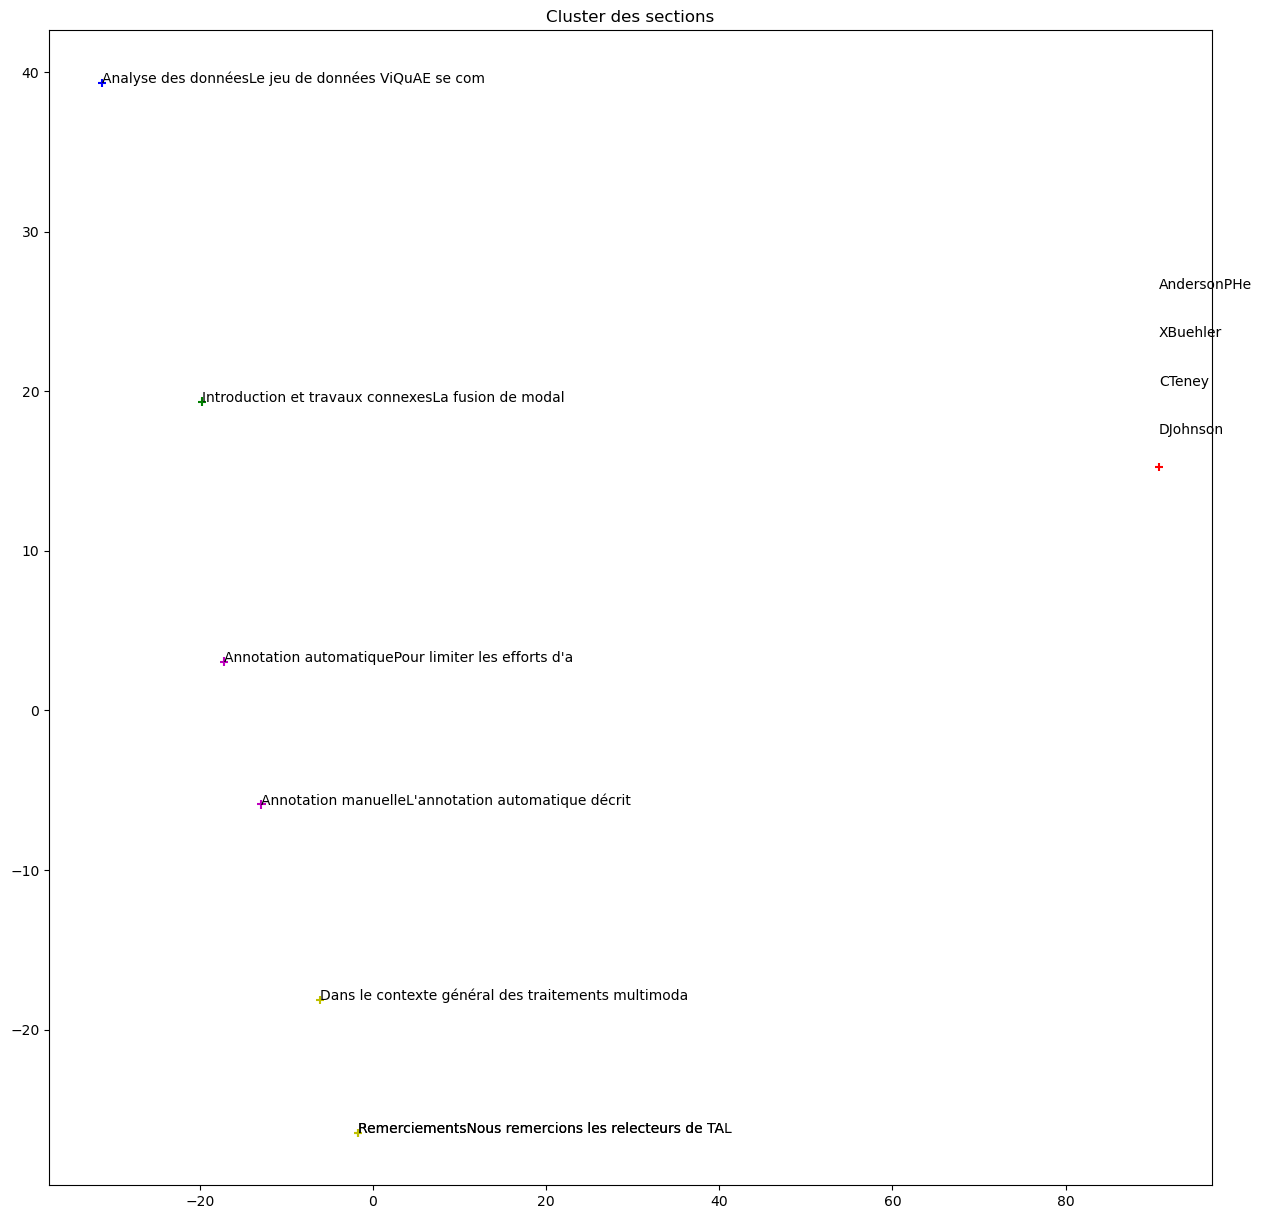

In [106]:
# cluster pour les tokens 

vecteurs = X
km = KMeans(n_clusters=5,init = 'k-means++', random_state =0, max_iter=500)
predire_clusters = km.fit_predict(vecteurs)

pca = PCA(n_components=3)
nuage_points = pca.fit_transform(vecteurs)

colors = ["b", "y", "r", "g", "m" ]

abscisses_x = [o[0] for o in nuage_points]
ordonnees_y = [o[1] for o in nuage_points]
fig, ax = plt.subplots(figsize=(15,15))

scatter = ax.scatter(abscisses_x, ordonnees_y, c=[colors[d] for d in predire_clusters], marker='+')
centroides = km.cluster_centers_


for i, txt in enumerate(liste_sections):
    ax.annotate(txt[0:50], (abscisses_x[i], ordonnees_y[i]))

ax.set_facecolor("white")
plt.title("Cluster des sections")

In [107]:
modele = spacy.load('fr_core_news_md')
#modele = spacy.load('en_core_web_sm')

In [108]:
texte_etiquettes = []
for par in liste_sections:
    liste_tokens = modele(par)
    liste_etiquettes = [token.pos_ for token in liste_tokens]
    texte_etiquettes.append(" ".join(liste_etiquettes))
print(type(liste_etiquettes))
print("nombre étiquettes paragraphes 1 : ", len(texte_etiquettes[0]))
print("nombre étiquettes paragraphes 2 : ", len(texte_etiquettes[1]))
print()
print("nombre de paragraphes étiquettés : ", len(texte_etiquettes))
print()
print("paragraphe étiquetté 1 : ", texte_etiquettes[0])

<class 'list'>
nombre étiquettes paragraphes 1 :  668
nombre étiquettes paragraphes 2 :  3031

nombre de paragraphes étiquettés :  8

paragraphe étiquetté 1 :  ADP DET NOUN ADJ ADP NOUN ADJ PUNCT PRON PRON VERB ADP DET NOUN ADP NOUN ADP DET NOUN ADJ ADP NOUN ADP NOUN VERB ADP VERB DET NOUN ADP NOUN PUNCT PROPN PUNCT PUNCT PRON VERB ADP NOUN VERB PUNCT DET ADJ NOUN ADP NOUN ADP DET DET NOUN ADJ ADP DET NOUN PUNCT VERB ADP DET NOUN ADP DET NOUN ADJ PUNCT PRON AUX DET ADJ NOUN ADP NOUN ADP PROPN VERB DET NOUN ADP NOUN ADJ VERB ADP DET NOUN ADP NOUN VERB NUM NOUN ADP NOUN PROPN PUNCT VERB NOUN CCONJ NOUN PUNCT PRON VERB ADV DET NOUN ADP NOUN ADP PROPN ADP NUM NOUN PUNCT NOUN ADP NOUN CCONJ NOUN ADP NOUN PUNCT DET NOUN ADP DET NOUN VERB ADV DET NOUN ADP DET NOUN CCONJ VERB DET NOUN ADP DET ADJ NOUN ADJ ADP NOUN VERB PUNCT


In [109]:
print(type(texte_etiquettes))
print(texte_etiquettes)

<class 'list'>
['ADP DET NOUN ADJ ADP NOUN ADJ PUNCT PRON PRON VERB ADP DET NOUN ADP NOUN ADP DET NOUN ADJ ADP NOUN ADP NOUN VERB ADP VERB DET NOUN ADP NOUN PUNCT PROPN PUNCT PUNCT PRON VERB ADP NOUN VERB PUNCT DET ADJ NOUN ADP NOUN ADP DET DET NOUN ADJ ADP DET NOUN PUNCT VERB ADP DET NOUN ADP DET NOUN ADJ PUNCT PRON AUX DET ADJ NOUN ADP NOUN ADP PROPN VERB DET NOUN ADP NOUN ADJ VERB ADP DET NOUN ADP NOUN VERB NUM NOUN ADP NOUN PROPN PUNCT VERB NOUN CCONJ NOUN PUNCT PRON VERB ADV DET NOUN ADP NOUN ADP PROPN ADP NUM NOUN PUNCT NOUN ADP NOUN CCONJ NOUN ADP NOUN PUNCT DET NOUN ADP DET NOUN VERB ADV DET NOUN ADP DET NOUN CCONJ VERB DET NOUN ADP DET ADJ NOUN ADJ ADP NOUN VERB PUNCT', 'NOUN CCONJ NOUN ADJ NOUN ADP NOUN ADJ SCONJ DET NOUN CCONJ DET NOUN ADP VERB DET NOUN AUX DET NOUN ADJ CCONJ ADJ ADP NOUN ADP DET NOUN ADP NOUN ADP DET ADJ PUNCT PROPN CCONJ SYM PUNCT PUNCT NUM PUNCT PUNCT PRON AUX ADV ADJ ADP VERB ADP DET NOUN ADJ ADP NOUN ADP NOUN VERB ADP VERB DET NOUN ADP NOUN PUNCT PROPN 

In [110]:
#from scipy.spatial import distance
V = CountVectorizer(analyzer='word',ngram_range=(1,5))
X_pos = V.fit_transform(texte_etiquettes).toarray()
#X_pos = V.fit_transform(texte_etiquettes).todense()
for cpt, vecteur in enumerate(X_pos):
    vecteur = vecteur
    if cpt<len(texte_etiquettes)-1:
        vecteur2 = X_pos[cpt+1]
        #similarite = cpt, distance.pairwise(vecteur, vecteur2) #todense
        similarite_cosine = cpt, distance.cosine(vecteur, vecteur2)
        print(similarite_cosine)
        #print(similarite)
#distances = distance.pairwise(X_pos) # todense
#ax = sns.heatmap(distances)

(0, 0.08666927192715923)
(1, 0.06779120989426912)
(2, 0.09100598397440485)
(3, 0.08755263362486343)
(4, 0.16159481673192333)
(5, 0.006637241481730727)
(6, 0.7625185644578502)


/home/didier/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


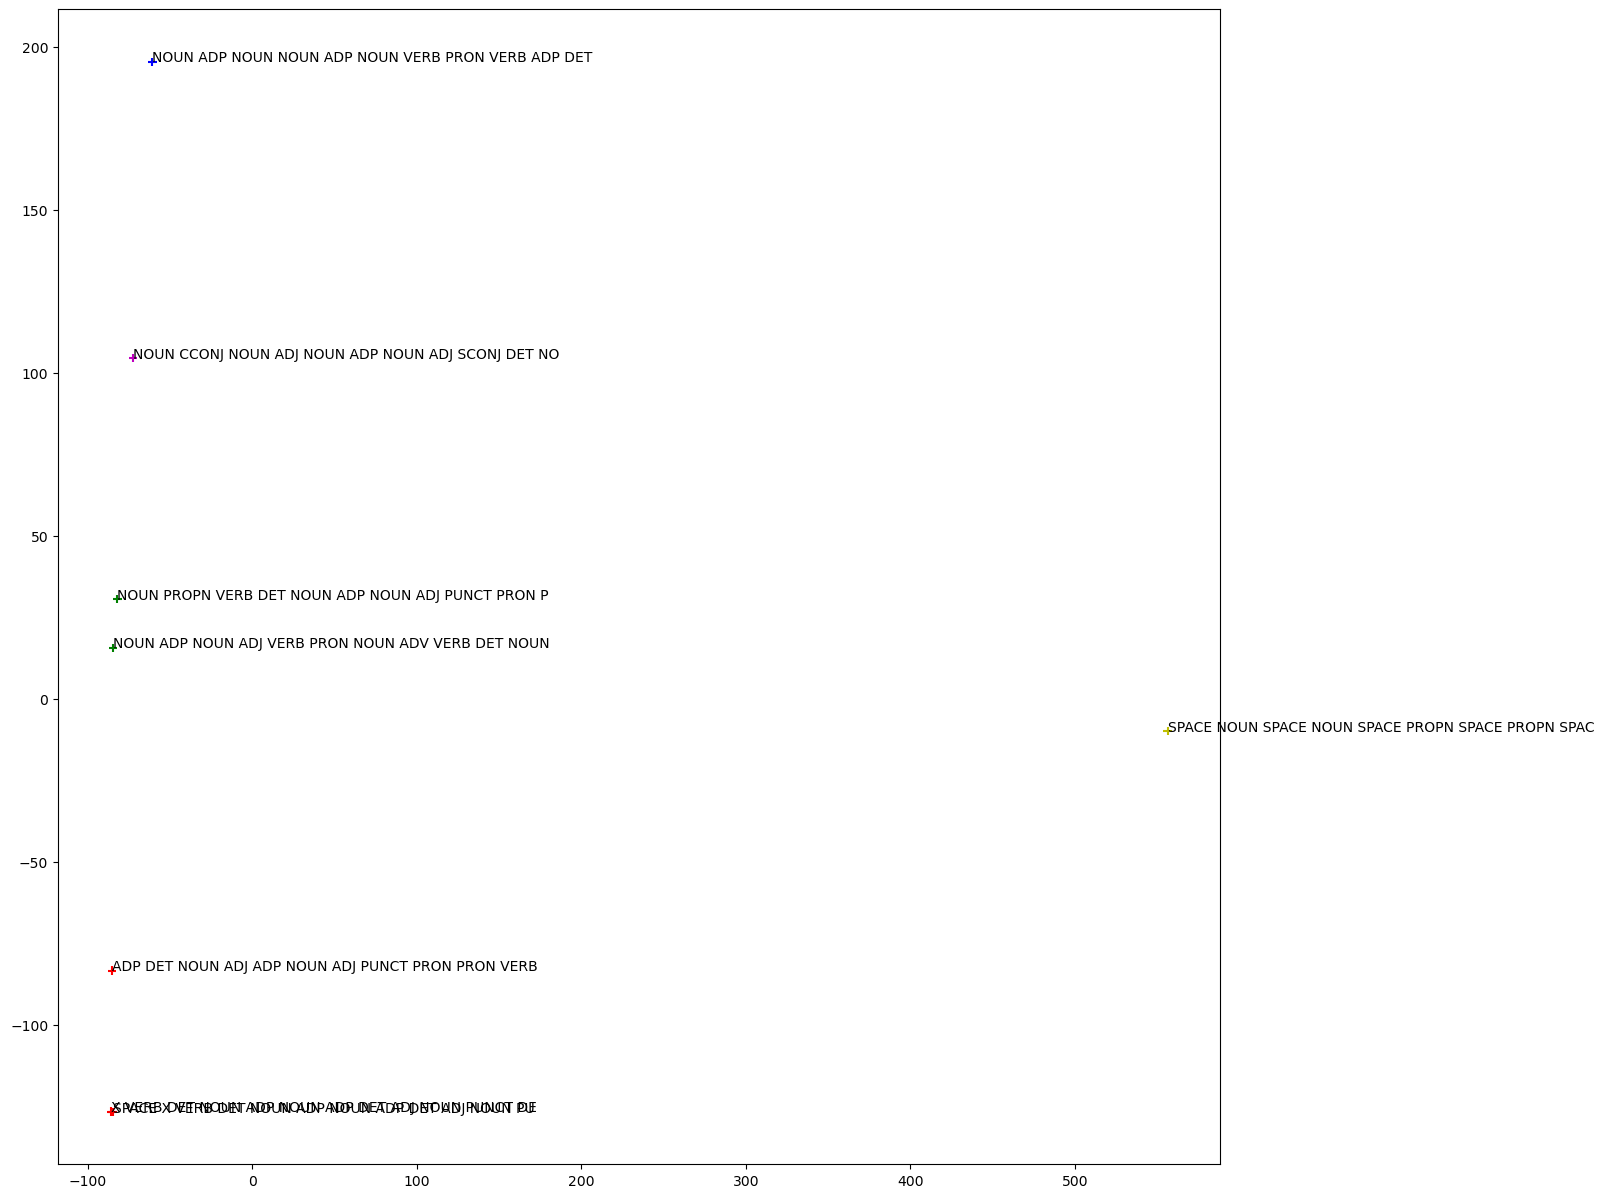

In [111]:
#cluster des unigrammes d'étiquettes 
vecteurs = X_pos
km = KMeans(n_clusters=5,init = 'k-means++', random_state = 0, max_iter=500)
predire_clusters = km.fit_predict(vecteurs)

pca = PCA(n_components=3)
nuage_points = pca.fit_transform(vecteurs)

colors = ["b", "y", "r", "g", "m" ]

abscisses_x = [o[0] for o in nuage_points]
ordonnees_y = [o[1] for o in nuage_points]

fig, ax = plt.subplots(figsize=(15,15))

scatter = ax.scatter(abscisses_x, ordonnees_y,c=[colors[d] for d in predire_clusters], marker='+')


centroides = km.cluster_centers_

cen_x = [i[0] for i in centroides] 
cen_y = [i[1] for i in centroides]


for i, txt in enumerate(texte_etiquettes):
    ax.annotate(txt[0:50], (abscisses_x[i], ordonnees_y[i]))

ax.set_facecolor("white")

In [112]:
# cluster des ngrammes d'étiquettes ()

In [113]:
print(cen_x)
print(cen_y)

[52.0, 23.0, 4.0, 19.5, 28.0]
[4.0, 1.0, 0.0, 0.0, 0.0]


In [114]:
print(km.labels_)

[2 4 3 3 0 2 2 1]


In [117]:
# calcul du taux de lexicalité avec le glaff  

with open("../data/GLAFF/glaff-1.2.2.txt",encoding='utf-8') as f:
    ligne = f.readline()
    cpt = 0 
    dic_glaff = {}
    while len(ligne) > 0:
        cpt += 1
        elements = re.split("\|", re.sub("\n", "", ligne))
        frequence = 0 
        forme = elements[0]
        for index in range(6, len(elements)+1, 2):
            frequence += float(elements[index])
        dic_glaff[forme] = frequence
        ligne = f.readline()
with open("freq_glaff_%i.json"%cpt, "w") as w:
    w.write(json.dumps(dic_glaff))
set_mots_glaff = set(dic_glaff.keys())
print("taille glaff : %i types"%len(set_mots_glaff))

taille glaff : 1082688 types


In [118]:
with open("freq_glaff_1406857.json", encoding='utf-8') as f:
        glaff = json.load(f)
        mots_glaff = set(glaff)

In [119]:
# calcul du taux de lexicalité de chaque article 
documents = {}
chemin_corpus = "../data_xml/*.xml"

for chemin in glob.glob(chemin_corpus):
    doc = documents[chemin] = lire_fichier(chemin)
    soup = BeautifulSoup(doc, 'html.parser')
    liste_sections = []
    last_section = []
    
    for cpt, bloc in enumerate(soup.find_all("div")):
        section = bloc.text
        if len(section) < 100:
            continue
            
        print("langue de la section : ", langid.classify(documents[chemin])) # voir si on a des documents dans une autre, les ignorer dans les traitements
        
        print("article : ", chemin)
        
        print("\033[1m" + "section",cpt, "\033[0m")
        print("---"*30)
        cpt += 1
        liste_sections.append(section)
        
        lexique = re.findall("[a-zA-ZÀ-ÿ][a-zA-ZÀ-ÿ-]*", section)
        set_mots_lexique = set(lexique)
        
        # fréquence des mots de chaque section 
        dic_freq = {}
        for mot in lexique:
            if mot not in dic_freq:
                dic_freq[mot] = 1
            else:
                dic_freq[mot] += 1
        paires = [[effectif, mot] for mot, effectif in dic_freq.items()]
        liste_tri = sorted(paires, reverse=True)
        plus_freq = set([mot for effectif, mot in liste_tri])
        
        communs = set(dic_freq.keys()).intersection(mots_glaff)
        absents = set(dic_freq.keys()).difference(mots_glaff)
        
        print("présents dans le glaff --->", len(communs))
        print("absents dans le glaff --->", len(absents))
    
        taux_de_lexicalite = len(communs)/len(dic_freq)
    
        print('\033[1;34m' + "taux de lexicalité : ",taux_de_lexicalite,'\033[0m')
    
        if taux_de_lexicalite < 0.5:
            print("!!!")
            
        # enregistrer dans des fichiers le taux de lexicalité des sections de chaque article 
        

/home/didier/anaconda3/lib/python3.10/site-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


langue de la section :  ('fr', -43375.875645160675)
article :  ../data_xml/101.pdf.tei.xml
section 0 
------------------------------------------------------------------------------------------
présents dans le glaff ---> 37
absents dans le glaff ---> 6
taux de lexicalité :  0.8604651162790697 
langue de la section :  ('fr', -43375.875645160675)
article :  ../data_xml/101.pdf.tei.xml
section 1 
------------------------------------------------------------------------------------------
présents dans le glaff ---> 150
absents dans le glaff ---> 33
taux de lexicalité :  0.819672131147541 
langue de la section :  ('fr', -43375.875645160675)
article :  ../data_xml/101.pdf.tei.xml
section 3 
------------------------------------------------------------------------------------------
présents dans le glaff ---> 88
absents dans le glaff ---> 28
taux de lexicalité :  0.7586206896551724 
langue de la section :  ('fr', -43375.875645160675)
article :  ../data_xml/101.pdf.tei.xml
section 4 
-----------

In [120]:
t0 = pf()

documents = {}
chemin_corpus = "../data_xml/*.xml"
for chemin in glob.glob(chemin_corpus):
    doc = documents[chemin] = lire_fichier(chemin)
    print(len(doc))
    soup = BeautifulSoup(doc, 'html.parser')
    
    liste_sections = []
    last_section_ngrams = []
    
    for cpt, bloc in enumerate(soup.find_all("div")):
        section = bloc.text
        if len(section) < 100:
            continue
        print("article : ", chemin)
        print()
        print("\033[1m" + "section",cpt, "\033[0m")
        cpt += 1
        #sections = re.split("\n\n", section)
        #print(sections)
        #print(section)
        liste_sections.append(section)
        
        print("étiquettage...")
        
        jar = 'stanford-postagger-full-2020-11-17/stanford-postagger.jar'
        modele = 'stanford-postagger-full-2020-11-17/models/french-ud.tagger'
        
        blob = TextBlob(section)
        pos_tag = StanfordPOSTagger(modele, jar, encoding='utf-8')
        
        tagged = pos_tag.tag(blob.split())
        #print(tagged)
        
        res = [[i for i in tagged], [j for i, j in tagged]]
        pos = res[1]
        pos = ' '.join(pos)
        
        #print(pos)
        
        # calcul des ngrammes d'étiquettes 
        pos = pos.lower()
        tokens = [token for token in pos.split(" ") if token != ""]
        
        pos_freq = nltk.FreqDist(tokens)
        ngram_freq = nltk.FreqDist(nltk.ngrams(tokens, 5))
        ngram_plus_freq = ngram_freq.most_common()
        
        #print(ngram_plus_freq)
        
        #calcul du motif le plus fréquent de chaque section
        cpt2 = 0
        for motif in ngram_plus_freq:
            nb_occurrences = ngram_plus_freq.count(motif)
            if nb_occurrences > cpt2:
                cpt2 = nb_occurrences
                plus_freq = motif
        print(plus_freq)
        #print(type(plus_freq))
        #print('motif le plus fréquent de cette section: ', plus_freq)
        
        #on cherche maintenant le motif plus fréquent dans chaque section qui se répète le plus dans les autres sections
        #print('motif le plus fréquent qui se répète le plus dans toutes les sections ou dans au moins quelques sections :')
        
        # on prend d'abord le motif le plus fréquent de chaque section
        
        #if plus_freq in ngram_plus_freq:
            #print("le motif le plus fréquent de cette section qui est : ", plus_freq, "est présent dans la section", cpt)
        #else:
            #print("ce motif n'est pas présent dans la section", cpt)
        
        
        
        toto = [nGram for nGram in ngram_plus_freq if nGram[1] > 1]
        #print(toto)
        
        if cpt > 0:
            ngrams_prec = [motif for motif, freq in last_section_ngrams]
            ngrams_courants = [motif for motif, freq in toto]
            intersection_sections = set(ngrams_prec).intersection(set(ngrams_courants))
            #print(intersection_sections)
            #print(section[:100])
            
            
        last_section_ngrams = toto
        
        #if cpt == 10:
            #break
        #dd = input("next")
t1 = pf()
        
print("temps mis : ", t1-t0, 's')


16736
article :  ../data_xml/101.pdf.tei.xml

section 0 
étiquettage...
(('verb', 'adp', 'noun', 'det', 'noun'), 1)
article :  ../data_xml/101.pdf.tei.xml

section 1 
étiquettage...
(('verb', 'adp', 'det', 'noun', 'adj'), 6)
article :  ../data_xml/101.pdf.tei.xml

section 3 
étiquettage...
(('noun', 'adp', 'noun', 'cconj', 'verb'), 3)
article :  ../data_xml/101.pdf.tei.xml

section 4 
étiquettage...
(('noun', 'adp', 'propn', 'adp', 'det'), 1)
article :  ../data_xml/101.pdf.tei.xml

section 5 
étiquettage...
(('noun', 'cconj', 'noun', 'adp', 'det'), 2)
article :  ../data_xml/101.pdf.tei.xml

section 6 
étiquettage...
(('noun', 'noun', 'cconj', 'adp', 'noun'), 3)
40405
article :  ../data_xml/taln-2008-long-001.pdf.tei.xml

section 0 
étiquettage...


/home/didier/anaconda3/lib/python3.10/site-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


(('adp', 'det', 'noun', 'adj', 'adj'), 3)
article :  ../data_xml/taln-2008-long-001.pdf.tei.xml

section 1 
étiquettage...
(('adp', 'det', 'noun', 'adj', 'noun'), 3)
article :  ../data_xml/taln-2008-long-001.pdf.tei.xml

section 2 
étiquettage...
(('x', 'x', 'x', 'x', 'x'), 5)
article :  ../data_xml/taln-2008-long-001.pdf.tei.xml

section 3 
étiquettage...
(('noun', 'adp', 'noun', 'adj', 'verb'), 2)
article :  ../data_xml/taln-2008-long-001.pdf.tei.xml

section 4 
étiquettage...
(('x', 'x', 'x', 'x', 'x'), 6)
article :  ../data_xml/taln-2008-long-001.pdf.tei.xml

section 5 
étiquettage...
(('noun', 'adj', 'adj', 'noun', 'adj'), 3)
article :  ../data_xml/taln-2008-long-001.pdf.tei.xml

section 6 
étiquettage...
(('propn', 'propn', 'propn', 'x', 'noun'), 1)
article :  ../data_xml/taln-2008-long-001.pdf.tei.xml

section 7 
étiquettage...
(('propn', 'propn', 'propn', 'propn', 'propn'), 2)
article :  ../data_xml/taln-2008-long-001.pdf.tei.xml

section 8 
étiquettage...
(('noun', 'adp', 'det

/home/didier/anaconda3/lib/python3.10/site-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


(('noun', 'adj', 'det', 'noun', 'adj'), 2)
article :  ../data_xml/968.pdf.tei.xml

section 1 
étiquettage...
(('det', 'noun', 'adp', 'det', 'noun'), 9)
article :  ../data_xml/968.pdf.tei.xml

section 2 
étiquettage...
(('adp', 'det', 'noun', 'adp', 'noun'), 4)
article :  ../data_xml/968.pdf.tei.xml

section 3 
étiquettage...
(('det', 'noun', 'adp', 'det', 'noun'), 4)
article :  ../data_xml/968.pdf.tei.xml

section 4 
étiquettage...
(('det', 'noun', 'adp', 'det', 'noun'), 8)
article :  ../data_xml/968.pdf.tei.xml

section 6 
étiquettage...
(('propn', 'verb', 'det', 'noun', 'adp'), 1)
article :  ../data_xml/968.pdf.tei.xml

section 7 
étiquettage...
(('propn', 'verb', 'det', 'noun', 'adp'), 1)
article :  ../data_xml/968.pdf.tei.xml

section 8 
étiquettage...
(('propn', 'propn', 'propn', 'propn', 'propn'), 149)
temps mis :  22.64326234300097 s


In [121]:
ngram_plus_freq_section1 = [(('det', 'noun', 'det', 'noun'), 5), (('adp', 'det', 'noun', 'adj'), 4),(('adp', 'det', 'noun', 'adj'), 4), (('adp', 'det', 'noun', 'adj'), 4)]
ngram_plus_freq_section2 = [(('noun', 'adj', 'cconj', 'verb'), 2), (('propn', 'aux', 'verb', 'adp', 3),(('adp', 'det', 'noun', 'adj'), 4))]

motif_plus_freq_section_8 = (('adp', 'det', 'noun', 'ade'), 4)

if motif_plus_freq_section_8 in ngram_plus_freq_section1 or motif_plus_freq_section_8 in ngram_plus_freq_section2:
    print("présent dans section", ngram_plus_freq_section1)
    print("présent dans section", ngram_plus_freq_section2)
else:
    print("n'est pas présent")

n'est pas présent
